# New York Lottery Forecast Analysis

#### Some people told me:" If you trust a stock market analyst, that even worse than trusting a monkey -- maybe the luck of monkey is much better than that of the stock analysts'!" That's why a lot of people would like to spend lots of money on lottery. In this project l will analysis the lottery. New York Lottery "Take 5" lottery is very famous all over the world. This publisher doesn't allow the content to be displayed in a frame either, so please find it in http://nylottery.ny.gov/wps/portal/Home/Lottery/Home/Daily+Games/TAKE+5

#### Everyone buys "Take 5" for winning the First Prize Level, so I can focus on coculating it. Usually we coculate the boring chances of winning like "5/39 * 4/38 * 3/37 * 2/36 * 1/35 = 1/575757". Do you believe that every lottery machine has its own regularity? I know a lot of people agree that. No problem, I can use Python to forecast the better number choice for the people if there is really some regulaerity in the machine or program. 

## 1. Data Acquisition

### Software Environment

In [1]:
import requests 
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import mpld3
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
rcParams['figure.dpi'] = 500
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

In [4]:
import json
from time import sleep
from datetime import datetime
massey_proxies = {
  "http": "http://alb-cache1.massey.ac.nz/",
 "https": "http://alb-cache1.massey.ac.nz/",
}

In [5]:
import unirest

#### Get the newest winning numbers by Web API. The server looks not very stabilized.

In [6]:
response_NewYorkLottery = unirest.get("https://ychen11-test2.p.mashape.com/query?category=take5&param1=40",
  headers={
    "X-Mashape-Key": "NIJbaoeUbhmsh3ii9l0mzDeDaa5Xp1p7zv8jsnuhkXaRNPn8wA",
    "Accept": "application/json"
  }
)

In [7]:
response_NewYorkLottery.body

{u'category': u'take 5',
 u'result': [[6, 5, 8, 3, 24],
  [2, 19, 30, 8, 5],
  [4, 26, 13, 18, 32],
  [22, 2, 5, 25, 20],
  [27, 15, 10, 23, 13],
  [16, 5, 22, 39, 19],
  [37, 18, 14, 34, 7],
  [29, 35, 39, 23, 8],
  [24, 9, 4, 14, 13],
  [33, 10, 8, 18, 34],
  [32, 13, 37, 7, 25],
  [27, 20, 11, 33, 14],
  [22, 32, 30, 21, 5],
  [39, 23, 32, 8, 13],
  [2, 4, 35, 25, 16],
  [37, 36, 23, 28, 34],
  [19, 25, 15, 3, 11],
  [6, 30, 34, 1, 16],
  [27, 20, 31, 33, 26],
  [24, 27, 1, 35, 7],
  [5, 22, 39, 17, 32],
  [3, 23, 35, 21, 28],
  [31, 27, 12, 3, 36],
  [4, 14, 30, 28, 10],
  [38, 9, 15, 21, 23],
  [27, 8, 36, 32, 21],
  [13, 2, 28, 17, 39],
  [1, 15, 33, 31, 3],
  [12, 18, 4, 36, 27],
  [16, 26, 19, 34, 37],
  [36, 7, 32, 19, 25],
  [1, 8, 28, 29, 32],
  [10, 1, 38, 12, 35],
  [24, 36, 15, 16, 21],
  [9, 33, 26, 39, 14],
  [25, 11, 15, 30, 12],
  [19, 33, 2, 17, 8],
  [10, 27, 36, 2, 34],
  [29, 24, 5, 20, 23],
  [7, 16, 12, 11, 29]],
 u'status': u'full'}

## 2. Data Wrangling

#### Now I need to clean the data. First check the type of the data:

In [8]:
type(response_NewYorkLottery.body)

dict

#### It's a dictionary, so I can use Pandas to create a data frame directly. 

In [9]:
result = response_NewYorkLottery.body
data_NewYorkLottery = pd.DataFrame(result['result'])
data_NewYorkLottery.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,6,2,4,22,27,16,37,29,24,33,...,36,1,10,24,9,25,19,10,29,7
1,5,19,26,2,15,5,18,35,9,10,...,7,8,1,36,33,11,33,27,24,16
2,8,30,13,5,10,22,14,39,4,8,...,32,28,38,15,26,15,2,36,5,12
3,3,8,18,25,23,39,34,23,14,18,...,19,29,12,16,39,30,17,2,20,11
4,24,5,32,20,13,19,7,8,13,34,...,25,32,35,21,14,12,8,34,23,29


#### To make it look logically, I change the names of the columns:

In [10]:
data_NewYorkLottery['FirstBall']=''
data_NewYorkLottery['SecondBall']=''
data_NewYorkLottery['ThirdBall']=''
data_NewYorkLottery['FourthBall']=''
data_NewYorkLottery['FifthBall']=''
data_NewYorkLottery.FirstBall.ix[:] = data_NewYorkLottery.ix[:,0]
data_NewYorkLottery.SecondBall.ix[:] = data_NewYorkLottery.ix[:,1]
data_NewYorkLottery.ThirdBall.ix[:] = data_NewYorkLottery.ix[:,2]
data_NewYorkLottery.FourthBall.ix[:] = data_NewYorkLottery.ix[:,3]
data_NewYorkLottery.FifthBall.ix[:] = data_NewYorkLottery.ix[:,4]
del data_NewYorkLottery[0]
del data_NewYorkLottery[1]
del data_NewYorkLottery[2]
del data_NewYorkLottery[3]
del data_NewYorkLottery[4]

D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\pandas\core\indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
data_NewYorkLottery.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
FirstBall,6,2,4,22,27,16,37,29,24,33,...,36,1,10,24,9,25,19,10,29,7
SecondBall,5,19,26,2,15,5,18,35,9,10,...,7,8,1,36,33,11,33,27,24,16
ThirdBall,8,30,13,5,10,22,14,39,4,8,...,32,28,38,15,26,15,2,36,5,12
FourthBall,3,8,18,25,23,39,34,23,14,18,...,19,29,12,16,39,30,17,2,20,11
FifthBall,24,5,32,20,13,19,7,8,13,34,...,25,32,35,21,14,12,8,34,23,29


#### Now the latest 40 groups of winning numbers are clear, and I can get the winning numbers' frequency. For example, which number won the first place most times?

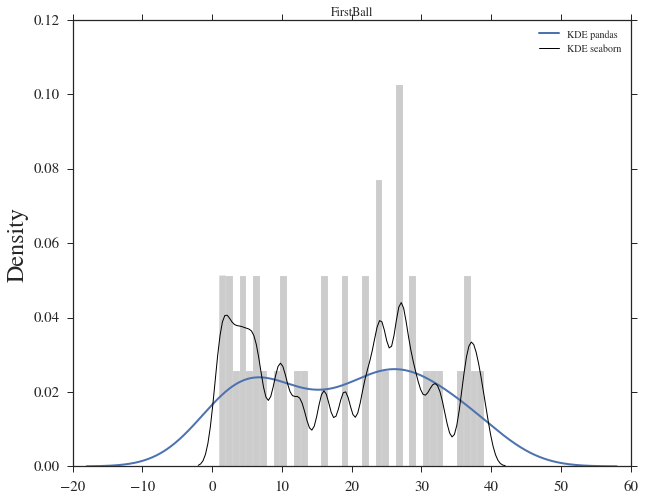

In [12]:
data_NewYorkLottery.FirstBall.hist(bins=39, normed=True, alpha=0.4, color='grey')
data_NewYorkLottery.FirstBall.plot(kind='kde', title='FirstBall', label='KDE pandas')
sns.kdeplot(data_NewYorkLottery.FirstBall, bw=1, color='black', lw=1.0, label='KDE seaborn')

#### In order to make it clearly, I need to sum up the contributions from all bins in that region by CDF. The eye is much better at judging distances than areas, so I can find the most frequent winning numbers are bigger numbers or smaller numbers by the line's  trend:

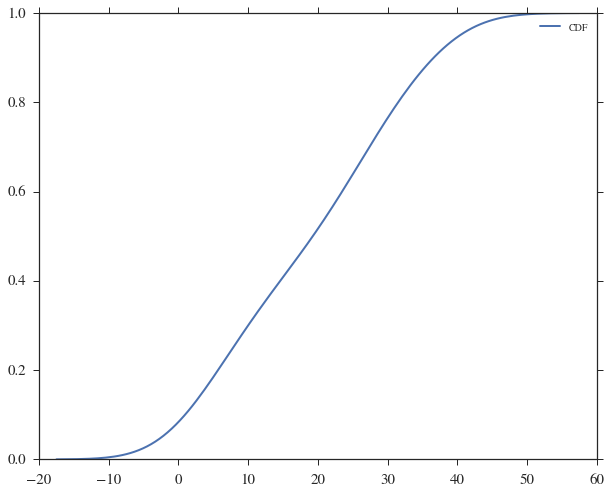

In [13]:
sns.kdeplot(data_NewYorkLottery.FirstBall, cumulative=True, label='CDF')

#### In the same way I can get the winning number frequency in the other four places. Because the data comes from up-to-date sources, the result you see now is different from the result I saw. But the winning number frequency is always the newest and dynamic!

## 3. Data Integration

#### People also need to know which number is most popular in all these five places in the recent time, because maybe they don't want to waste time to think which number is better.

In [14]:
data_NewYorkLottery.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
FirstBall,6,2,4,22,27,16,37,29,24,33,...,36,1,10,24,9,25,19,10,29,7
SecondBall,5,19,26,2,15,5,18,35,9,10,...,7,8,1,36,33,11,33,27,24,16
ThirdBall,8,30,13,5,10,22,14,39,4,8,...,32,28,38,15,26,15,2,36,5,12
FourthBall,3,8,18,25,23,39,34,23,14,18,...,19,29,12,16,39,30,17,2,20,11
FifthBall,24,5,32,20,13,19,7,8,13,34,...,25,32,35,21,14,12,8,34,23,29


#### Use Concatenation to make a new winning number data set:

In [15]:
data_FirstBall = data_NewYorkLottery.FirstBall
data_SecondBall = data_NewYorkLottery.SecondBall
data_ThirdBall = data_NewYorkLottery.ThirdBall
data_FourthBall = data_NewYorkLottery.FourthBall
data_FifthBall = data_NewYorkLottery.FifthBall
data_WinningBalls = pd.concat([data_FirstBall, data_SecondBall, data_ThirdBall, data_FourthBall, data_FifthBall], ignore_index=True)
data_WinningBalls.head()

0     6
1     2
2     4
3    22
4    27
dtype: int64

#### Use KDE to tell the people that which winning numbers are popular now:

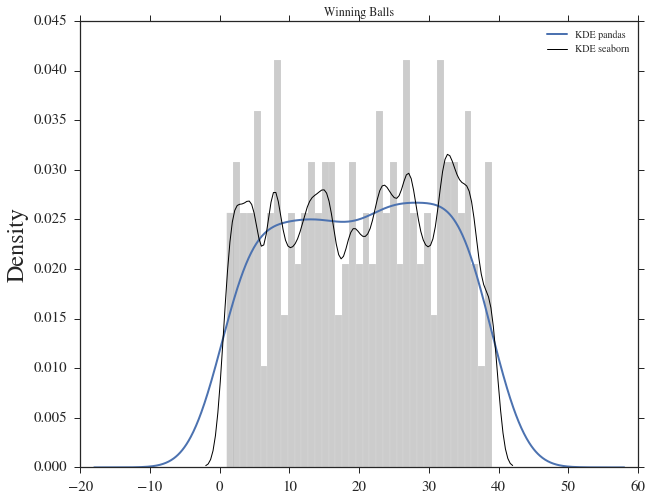

In [16]:
data_WinningBalls.hist(bins=39, normed=True, alpha=0.4, color='grey')
data_WinningBalls.plot(kind='kde', title='Winning Balls', label='KDE pandas')
sns.kdeplot(data_WinningBalls, bw=1, color='black', lw=1.0, label='KDE seaborn')

## 4. Data Analysis

#### People has got a lot of useful information from our plotting. But if they want some precise referance number, I need Group-by operations. First, create a new data set:

In [17]:
data_WinningBalls_Place = pd.DataFrame({'Place' : '',
                   'Number' : data_WinningBalls})
data_WinningBalls_Place.Place.ix[:39] = 'First'
data_WinningBalls_Place.Place.ix[40:79] = 'Second'
data_WinningBalls_Place.Place.ix[80:119] = 'Third'
data_WinningBalls_Place.Place.ix[120:159] = 'Fourth'
data_WinningBalls_Place.Place.ix[160:199] = 'Fifth'
data_WinningBalls_Place.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Number,6,2,4,22,27,16,37,29,24,33,...,25,32,35,21,14,12,8,34,23,29
Place,First,First,First,First,First,First,First,First,First,First,...,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth


#### Group the data:

In [18]:
WinningBalls_grouped = data_WinningBalls_Place['Number'].groupby(data_WinningBalls_Place['Place'])
WinningBalls_grouped

#### Now I can give people more useful information. For example, if they likes bigger numbers, I can show them the biggest winning number for each place in the past 40 winning groups:

In [19]:
data_WinningBalls_Place['Number'].groupby(data_WinningBalls_Place['Place']).max()

Place
Fifth     39
First     39
Fourth    39
Second    36
Third     39
Name: Number, dtype: int64

#### Or they likes smaller numbers:

In [20]:
data_WinningBalls_Place['Number'].groupby(data_WinningBalls_Place['Place']).min()

Place
Fifth     3
First     1
Fourth    1
Second    1
Third     1
Name: Number, dtype: int64

#### I can also tell them the median number for each place:

In [21]:
data_WinningBalls_Place['Number'].groupby(data_WinningBalls_Place['Place']).median()

Place
Fifth     21.0
First     20.5
Fourth    21.0
Second    18.5
Third     22.5
Name: Number, dtype: float64

#### Even everything about these numbers in the table:

In [22]:
WinningBalls_grouped.agg(['sum','count','mean','median','min','max','std','var'])

,sum,count,mean,median,min,max,std,var
Place,,,,,,,,
Fifth,831,40,20.775,21.0,3,39,10.506378,110.383974
First,755,40,18.875,20.5,1,39,12.159596,147.855769
Fourth,834,40,20.850,21.0,1,39,11.083714,122.848718
Second,734,40,18.350,18.5,1,36,10.435516,108.900000
Third,862,40,21.550,22.5,1,39,12.280796,150.817949


#### Make a quick plot of this data, if people wants to get some feeling about the trend of each place.

Place
Fifth     Axes(0.125,0.125;0.775x0.775)
First     Axes(0.125,0.125;0.775x0.775)
Fourth    Axes(0.125,0.125;0.775x0.775)
Second    Axes(0.125,0.125;0.775x0.775)
Third     Axes(0.125,0.125;0.775x0.775)
dtype: object

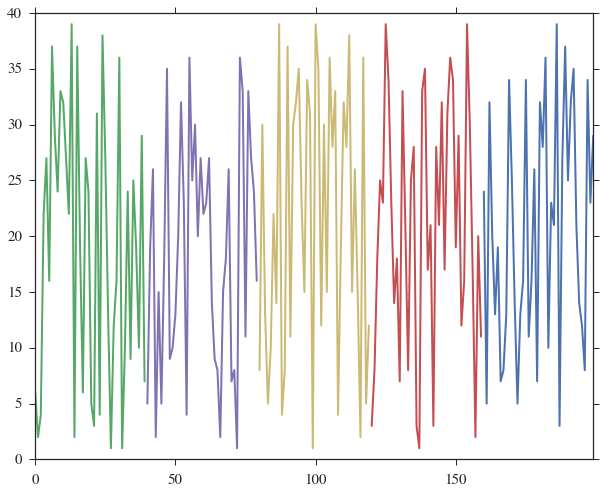

In [23]:
WinningBalls_grouped.plot()

#### Sometimes people like to choose the numbers form every range for a feeling of balance. For instance, some people may choose one number from "1-9", two numbers from "10-19",  one number from "20-29"and one numbers from "30-39". No problem, I can also give people some referance like that:

In [24]:
data_WinningBalls_Place['Range']=''
for x in range(0,200):
    if data_WinningBalls_Place.Number[x] >= 30:
        data_WinningBalls_Place.Range[x] = '30-39' 
    else:
        if data_WinningBalls_Place.Number[x] >= 20:
            data_WinningBalls_Place.Range[x] = '20-29' 
        else:
            if data_WinningBalls_Place.Number[x] >= 10:
                data_WinningBalls_Place.Range[x] = '10-19' 
            else:
                data_WinningBalls_Place.Range[x] = '1-9'

D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\ipykernel\__main_

In [25]:
data_WinningBalls_Place.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Number,6,2,4,22,27,16,37,29,24,33,...,25,32,35,21,14,12,8,34,23,29
Place,First,First,First,First,First,First,First,First,First,First,...,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth,Fifth
Range,1-9,1-9,1-9,20-29,20-29,10-19,30-39,20-29,20-29,30-39,...,20-29,30-39,30-39,20-29,10-19,10-19,1-9,30-39,20-29,20-29


#### Use cross-tabulation to make the referance table:

In [26]:
pd.crosstab(data_WinningBalls_Place.Place, data_WinningBalls_Place.Range, margins=True)

Range,1-9,10-19,20-29,30-39,All
Place,,,,,
Fifth,7,11,12,10,40
First,12,8,12,8,40
Fourth,8,10,11,11,40
Second,11,10,12,7,40
Third,8,11,5,16,40
All,46,50,52,52,200


## 5. Predictive Modelling (Regression)

#### Some people believe that there are some unbeknown regularity among the 5 numbers in each winning group. Is there any clue linking the different numbers? If people think so, I can give them some help and advices with python. I will focus on these 40 newest groups:

In [27]:
data_NewYorkLottery.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
FirstBall,6,2,4,22,27,16,37,29,24,33,...,36,1,10,24,9,25,19,10,29,7
SecondBall,5,19,26,2,15,5,18,35,9,10,...,7,8,1,36,33,11,33,27,24,16
ThirdBall,8,30,13,5,10,22,14,39,4,8,...,32,28,38,15,26,15,2,36,5,12
FourthBall,3,8,18,25,23,39,34,23,14,18,...,19,29,12,16,39,30,17,2,20,11
FifthBall,24,5,32,20,13,19,7,8,13,34,...,25,32,35,21,14,12,8,34,23,29


#### Software Environment

In [28]:
import statsmodels.formula.api as smf
import scipy
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import math 
from sklearn import neighbors

In [29]:
from pylab import rcParams

sns.set(style="ticks")

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

#### Firstly, try to find the clue linking the first number and the second number:

D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attrib

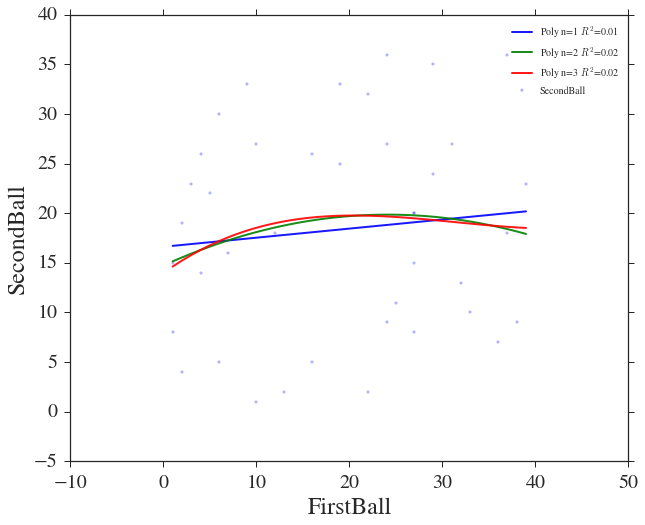

In [30]:
plt.scatter(data_NewYorkLottery.FirstBall, data_NewYorkLottery.SecondBall, s=10, alpha=0.3)
plt.xlabel('FirstBall')
plt.ylabel('SecondBall')

x = pd.DataFrame({'FirstBall': np.linspace(data_NewYorkLottery.FirstBall.min(),
                                            data_NewYorkLottery.FirstBall.max(), len(data_NewYorkLottery.FirstBall)) })

poly_1 = smf.ols(formula='SecondBall ~ 1 + FirstBall', data=data_NewYorkLottery).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

poly_2 = smf.ols(formula='SecondBall ~ 1 + FirstBall + I(FirstBall ** 2.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

poly_3 = smf.ols(formula='SecondBall ~ 1 + FirstBall + I(FirstBall ** 2.0) + I(FirstBall ** 3.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

#### Now I get 3 polynomial models and 3 R^2. Record the highest value of R^2 because this number indicates how well the data fit the statistical model. We can name it "1to2 R^2". 

#### Secondly, try to find the clue linking the second number and the third number:

D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attrib

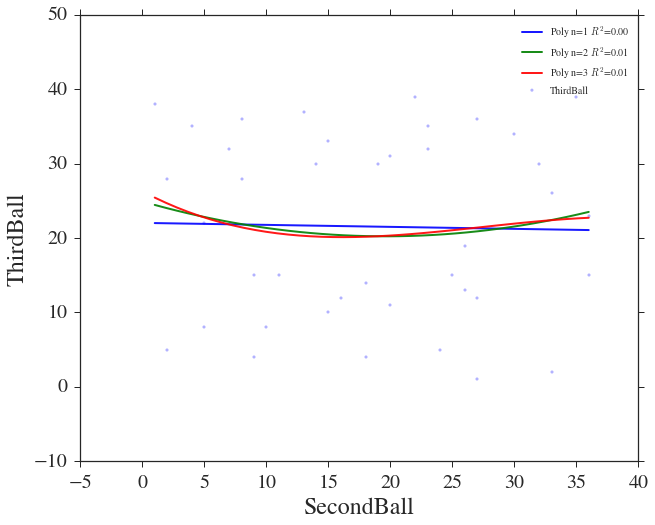

In [31]:
plt.scatter(data_NewYorkLottery.SecondBall, data_NewYorkLottery.ThirdBall, s=10, alpha=0.3)
plt.xlabel('SecondBall')
plt.ylabel('ThirdBall')

x = pd.DataFrame({'SecondBall': np.linspace(data_NewYorkLottery.SecondBall.min(),
                                            data_NewYorkLottery.SecondBall.max(), len(data_NewYorkLottery.SecondBall)) })

poly_1 = smf.ols(formula='ThirdBall ~ 1 + SecondBall', data=data_NewYorkLottery).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

poly_2 = smf.ols(formula='ThirdBall ~ 1 + SecondBall + I(SecondBall ** 2.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

poly_3 = smf.ols(formula='ThirdBall ~ 1 + SecondBall + I(SecondBall ** 2.0) + I(SecondBall ** 3.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

#### Record the highest value of R squared and name it "2to3 R^2". Then go on the clue linking the third number and the four number:

D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attrib

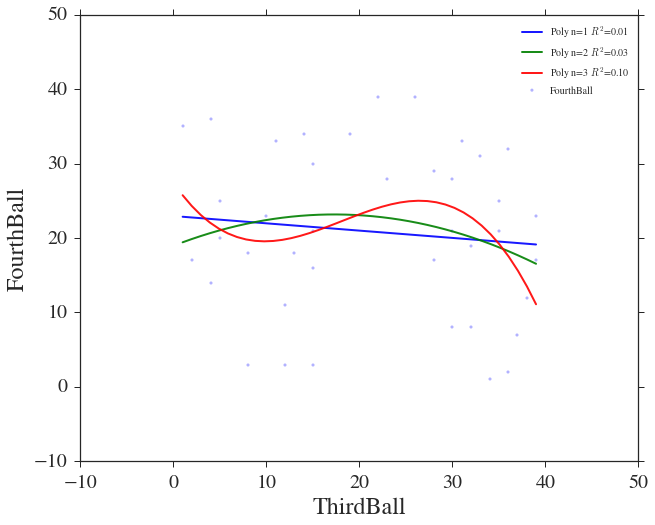

In [32]:
plt.scatter(data_NewYorkLottery.ThirdBall, data_NewYorkLottery.FourthBall, s=10, alpha=0.3)
plt.xlabel('ThirdBall')
plt.ylabel('FourthBall')

x = pd.DataFrame({'ThirdBall': np.linspace(data_NewYorkLottery.ThirdBall.min(),
                                            data_NewYorkLottery.ThirdBall.max(), len(data_NewYorkLottery.ThirdBall)) })

poly_1 = smf.ols(formula='FourthBall ~ 1 + ThirdBall', data=data_NewYorkLottery).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

poly_2 = smf.ols(formula='FourthBall ~ 1 + ThirdBall + I(ThirdBall ** 2.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

poly_3 = smf.ols(formula='FourthBall ~ 1 + ThirdBall + I(ThirdBall ** 2.0) + I(ThirdBall ** 3.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

#### Record the "3to4 R^2". Next go on the last clue linking the fourth number and the fifth number:

D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  exog = dmatrix(self.model.data.orig_exog.design_info.builder,
D:\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\statsmodels\base\model.py:739: DeprecationWarning: The DesignInfo.builder attrib

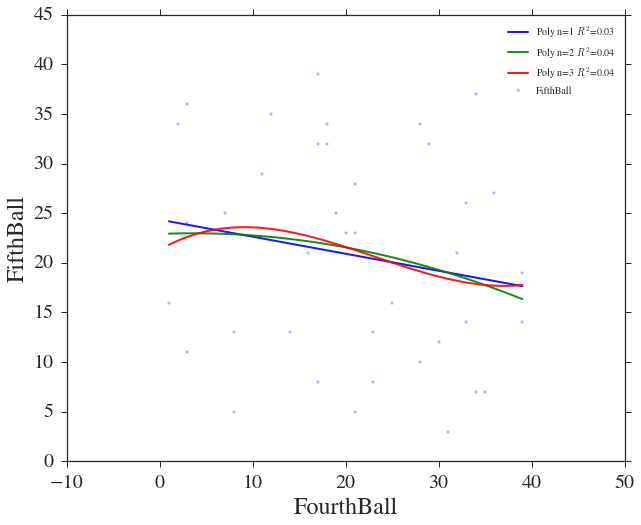

In [33]:
plt.scatter(data_NewYorkLottery.FourthBall, data_NewYorkLottery.FifthBall, s=10, alpha=0.3)
plt.xlabel('FourthBall')
plt.ylabel('FifthBall')

x = pd.DataFrame({'FourthBall': np.linspace(data_NewYorkLottery.FourthBall.min(),
                                            data_NewYorkLottery.FourthBall.max(), len(data_NewYorkLottery.FourthBall)) })


poly_1 = smf.ols(formula='FifthBall ~ 1 + FourthBall', data=data_NewYorkLottery).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

poly_2 = smf.ols(formula='FifthBall ~ 1 + FourthBall + I(FourthBall ** 2.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

poly_3 = smf.ols(formula='FifthBall ~ 1 + FourthBall + I(FourthBall ** 2.0) + I(FourthBall ** 3.0)', data=data_NewYorkLottery).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

####  OK we get the last "4to5 R^2". Now we can coculate the product of the 4 different R squared ("1to2 R^2", "2to3 R^2", "3to4 R^2" and "4to5 R^2"), and if the result is bigger than 1/575757 (5/39 * 4/38 * 3/37 * 2/36 * 1/35), people can coculate the number one by one in the four polynomial models and get a bigger chance to win the First Prize! If the result is smaller than 1/575757, they can wait for the next chance because the number and the models are dynamic. If people likes coculating the models, they always have chances!

# Just for fun. Thank you! :)